# [Traveling Salesman Problem](https://developers.google.com/optimization/routing/tsp)

[**Reference**] [Google Optimization Tools](https://developers.google.com/optimization/)

## Example: drilling a circuit board

The next example involes drilling holes in a circuit board with an automated drill. The problem is to find the shortest route for the drill to take on the board in order to drill all of the required holes. The example is taken from [TSPLIB](https://www.iwr.uni-heidelberg.de/groups/comopt/software/TSPLIB95/), a library of TSP problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
default_locations = [
    [288, 149], [288, 129], [270, 133], [256, 141], [256, 157],
    [246, 157], [236, 169], [228, 169], [228, 161], [220, 169],
    [212, 169], [204, 169], [196, 169], [188, 169], [196, 161],
    [188, 145], [172, 145], [164, 145], [156, 145], [148, 145],
    [140, 145], [148, 169], [164, 169], [172, 169], [156, 169],
    [140, 169], [132, 169], [124, 169], [116, 161], [104, 153],
    [104, 161], [104, 169], [ 90, 165], [ 80, 157], [ 64, 157],
    [ 64, 165], [ 56, 169], [ 56, 161], [ 56, 153], [ 56, 145],
    [ 56, 137], [ 56, 129], [ 56, 121], [ 40, 121], [ 40, 129],
    [ 40, 137], [ 40, 145], [ 40, 153], [ 40, 161], [ 40, 169],
    [ 32, 169], [ 32, 161], [ 32, 153], [ 32, 145], [ 32, 137],
    [ 32, 129], [ 32, 121], [ 32, 113], [ 40, 113], [ 56, 113],
    [ 56, 105], [ 48,  99], [ 40,  99], [ 32,  97], [ 32,  89],
    [ 24,  89], [ 16,  97], [ 16, 109], [  8, 109], [  8,  97],
    [  8,  89], [  8,  81], [  8,  73], [  8,  65], [  8,  57],
    [ 16,  57], [  8,  49], [  8,  41], [ 24,  45], [ 32,  41],
    [ 32,  49], [ 32,  57], [ 32,  65], [ 32,  73], [ 32,  81],
    [ 40,  83], [ 40,  73], [ 40,  63], [ 40,  51], [ 44,  43],
    [ 44,  35], [ 44,  27], [ 32,  25], [ 24,  25], [ 16,  25],
    [ 16,  17], [ 24,  17], [ 32,  17], [ 44,  11], [ 56,   9],
    [ 56,  17], [ 56,  25], [ 56,  33], [ 56,  41], [ 64,  41],
    [ 72,  41], [ 72,  49], [ 56,  49], [ 48,  51], [ 56,  57],
    [ 56,  65], [ 48,  63], [ 48,  73], [ 56,  73], [ 56,  81],
    [ 48,  83], [ 56,  89], [ 56,  97], [104,  97], [104, 105],
    [104, 113], [104, 121], [104, 129], [104, 137], [104, 145],
    [116, 145], [124, 145], [132, 145], [132, 137], [140, 137],
    [148, 137], [156, 137], [164, 137], [172, 125], [172, 117],
    [172, 109], [172, 101], [172,  93], [172,  85], [180,  85],
    [180,  77], [180,  69], [180,  61], [180,  53], [172,  53],
    [172,  61], [172,  69], [172,  77], [164,  81], [148,  85],
    [124,  85], [124,  93], [124, 109], [124, 125], [124, 117],
    [124, 101], [104,  89], [104,  81], [104,  73], [104,  65],
    [104,  49], [104,  41], [104,  33], [104,  25], [104,  17],
    [ 92,   9], [ 80,   9], [ 72,   9], [ 64,  21], [ 72,  25],
    [ 80,  25], [ 80,  25], [ 80,  41], [ 88,  49], [104,  57],
    [124,  69], [124,  77], [132,  81], [140,  65], [132,  61],
    [124,  61], [124,  53], [124,  45], [124,  37], [124,  29],
    [132,  21], [124,  21], [120,   9], [128,   9], [136,   9],
    [148,   9], [162,   9], [156,  25], [172,  21], [180,  21],
    [180,  29], [172,  29], [172,  37], [172,  45], [180,  45],
    [180,  37], [188,  41], [196,  49], [204,  57], [212,  65],
    [220,  73], [228,  69], [228,  77], [236,  77], [236,  69],
    [236,  61], [228,  61], [228,  53], [236,  53], [236,  45],
    [228,  45], [228,  37], [236,  37], [236,  29], [228,  29],
    [228,  21], [236,  21], [252,  21], [260,  29], [260,  37],
    [260,  45], [260,  53], [260,  61], [260,  69], [260,  77],
    [276,  77], [276,  69], [276,  61], [276,  53], [284,  53],
    [284,  61], [284,  69], [284,  77], [284,  85], [284,  93],
    [284, 101], [288, 109], [280, 109], [276, 101], [276,  93],
    [276,  85], [268,  97], [260, 109], [252, 101], [260,  93],
    [260,  85], [236,  85], [228,  85], [228,  93], [236,  93],
    [236, 101], [228, 101], [228, 109], [228, 117], [228, 125],
    [220, 125], [212, 117], [204, 109], [196, 101], [188,  93],
    [180,  93], [180, 101], [180, 109], [180, 117], [180, 125],
    [196, 145], [204, 145], [212, 145], [220, 145], [228, 145],
    [236, 145], [246, 141], [252, 125], [260, 129], [280, 133]
]

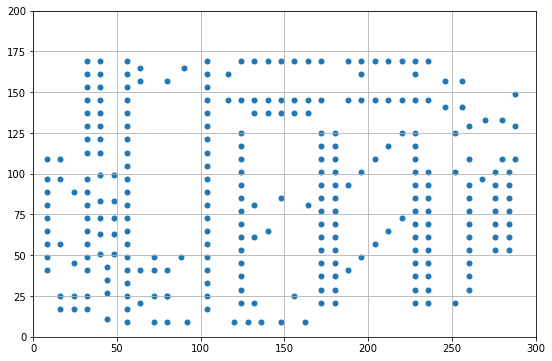

In [3]:
x, y = np.swapaxes(np.asarray(default_locations), 0, 1)

fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(x, y, s=25)
ax.set_xlim(0, 300)
ax.set_ylim(0, 200)
ax.grid()

plt.show()

In [4]:
def euclid_distance(x1, y1, x2, y2):
    # Euclidean distance between points.
    dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return dist

def create_distance_matrix(locations):
    # Create the distance matrix.
    size = len(locations)
    dist_matrix = {}

    for from_node in range(size):
        dist_matrix[from_node] = {}
        for to_node in range(size):
            x1 = locations[from_node][0]
            y1 = locations[from_node][1]
            x2 = locations[to_node][0]
            y2 = locations[to_node][1]
            dist_matrix[from_node][to_node] = euclid_distance(x1, y1, x2, y2)

    return dist_matrix

def create_distance_callback(dist_matrix):
    # Create the distance callback.

    def distance_callback(from_node, to_node):
        return int(dist_matrix[from_node][to_node])

    return distance_callback

def create_data_array(size):
    return np.random.randint(1000, 10000, size=(size, 2))

default_dist_matrix = create_distance_matrix(default_locations)
default_dist_callback = create_distance_callback(default_dist_matrix)

## Changing the search strategy

Since TSPs are computationally intractable, **the routing solver does not always find the optimal solution to a problem**.

To find a better solution, you can use a more advanced search strategy, called **guided local search**, which enables the solver to escape a local minimum. After moving away from the local minimum, the solver continues the search.

Search strategies like this are called **local search metaheuristics**.

### Local search options

The following options set local search strategies. See the description of `LocalSearchMetaheuristic` in [routing_enums.proto](https://github.com/google/or-tools/blob/master/ortools/constraint_solver/routing_enums.proto) on GitHub for details.

  - **`local_search_metaheuristic`** - string (default: `AUTOMATIC`) 	Use guided local search.  
  - **`guided_local_search_lambda_coefficient`** - double (default: 0.1) 	Lambda coefficient used to penalize arc costs when `GUIDED_LOCAL_SEARCH` is used.

#### Guided local search options

    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)

  - `AUTOMATIC` 	Lets the solver select the metaheuristic.
  - `GREEDY_DESCENT` 	Accepts improving (cost-reducing) local search neighbors until a local minimum is reached.
  - `GUIDED_LOCAL_SEARCH` 	Uses guided local search to escape local minima (cf. [Guided_Local_Search](http://en.wikipedia.org/wiki/Guided_Local_Search)); this is generally the most efficient metaheuristic for vehicle routing.
  - `SIMULATED_ANNEALING` 	Uses simulated annealing to escape local minima (cf. [Simulated_annealing](http://en.wikipedia.org/wiki/Simulated_annealing)).
  - `TABU_SEARCH` 	Uses tabu search to escape local minima (cf. [Tabu_search](http://en.wikipedia.org/wiki/Tabu_search)).
  - `OBJECTIVE_TABU_SEARCH` 	Uses tabu search on the objective value of solution to escape local minima

### Search control

  - **`first_solution_strategy`** - string (default: `AUTOMATIC`) 	First solution strategies, used as starting point of local search. Below are First solution strategy options for a list of available options.
  
  - **`optimization_step`** - int64 (default: 1) 	Minimum step by which the solution must be improved in local search.

#### First solution strategy options

    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
                                    
  - `AUTOMATIC` 	Lets the solver detect which strategy to use according to the model being solved.
  - `PATH_CHEAPEST_ARC` 	Starting from a route "start" node, connect it to the node which produces the cheapest route segment, then extend the route by iterating on the last node added to the route.
  - `PATH_MOST_CONSTRAINED_ARC` 	Similar to `PATH_CHEAPEST_ARC`, but arcs are evaluated with a comparison-based selector which will favor the most constrained arc first. To assign a selector to the routing model, use the method `ArcIsMoreConstrainedThanArc()`.
  - `EVALUATOR_STRATEGY` 	Similar to `PATH_CHEAPEST_ARC`, except that arc costs are evaluated using the function passed to `SetFirstSolutionEvaluator()`.
  - `SAVINGS` 	Savings algorithm (Clarke & Wright).
  - `CHRISTOFIDES` 	Christofides algorithm (actually a variant of the Christofides algorithm using a maximal matching instead of a maximum matching, which does not guarantee the 3/2 factor of the approximation on a metric travelling salesman). Works on generic vehicle routing models by extending a route until no nodes can be inserted on it.
  - `ALL_UNPERFORMED` 	Make all nodes inactive. Only finds a solution if nodes are optional (are element of a disjunction constraint with a finite penalty cost).
  - `BEST_INSERTION` 	Iteratively build a solution by inserting the cheapest node at its cheapest position; the cost of insertion is based on the global cost function of the routing model. As of 2/2012, only works on models with optional nodes (with finite penalty costs).
  - `PARALLEL_CHEAPEST_INSERTION` 	Iteratively build a solution by inserting the cheapest node at its cheapest position; the cost of insertion is based on the the arc cost function. Is faster than `BEST_INSERTION`.
  - `LOCAL_CHEAPEST_INSERTION` 	Iteratively build a solution by inserting each node at its cheapest position; the cost of insertion is based on the the arc cost function. Differs from `PARALLEL_CHEAPEST_INSERTION` by the node selected for insertion; here nodes are considered in their order of creation. Is faster than `PARALLEL_CHEAPEST_INSERTION`.
  - `GLOBAL_CHEAPEST_ARC` 	Iteratively connect two nodes which produce the cheapest route segment.
  - `LOCAL_CHEAPEST_ARC` 	Select the first node with an unbound successor and connect it to the node which produces the cheapest route segment.
  - `FIRST_UNBOUND_MIN_VALUE` 	Select the first node with an unbound successor and connect it to the first available node. This is equivalent to the `CHOOSE_FIRST_UNBOUND` strategy combined with `ASSIGN_MIN_VALUE` (cf. constraint_solver.h).

### Search limits

Search limits terminate the solver after it reaches a specified limit, such as the maximum length of time, or number of solutions found. You can set a search limit through the solver's search parameters. Here's a Python example that sets a time limit of 30 seconds (30000 milliseconds) for the solver.

>     search_parameters.time_limit_ms = 30000

  - **`solution_limit`** - int64 (default: kint64max) 	Limit to the number of solutions generated during the search.
  - **`time_limit_ms`** - int64 (default: kint64max) 	Limit in milliseconds to the time spent in the search.
  - **`lns_time_limit_ms`** - int64 (default: 100) 	Limit in milliseconds to the time spent in the completion search for each local search neighbor.

In [5]:
"""Simple travelling salesman problem on a circuit board."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def tcp_with_cpsolver(tsp_size, time_limit=0, dist_callback=default_dist_callback):
    num_routes = 1
    depot = 0

    # Create routing model.
    if tsp_size > 0:
        # Create the routing index manager.
        manager = pywrapcp.RoutingIndexManager(tsp_size, num_routes, depot)
        # Create Routing Model.
        routing = pywrapcp.RoutingModel(manager)

        transit_callback_index = routing.RegisterTransitCallback(dist_callback)
        
        # Define cost of each arc.
        routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

        # Setting first solution heuristic.
        search_parameters = pywrapcp.DefaultRoutingSearchParameters()
        search_parameters.first_solution_strategy = (
            routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
        )

        if time_limit > 0:
            #search_parameters.local_search_metaheuristic = (
            #    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
            #)
            search_parameters.time_limit.seconds = time_limit
            #search_parameters.log_search = True

        # Solve the problem.
        assignment = routing.SolveWithParameters(search_parameters)
        if assignment:
            # Solution cost.
            print("Total distance: {}".format(assignment.ObjectiveValue()), end='\n')
            # Inspect solution.
            # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1.
            route_number = 0
            node = routing.Start(route_number)
            start_node = node
            route = ''
            while not routing.IsEnd(node):
                route += '{} -> '.format(node)
                node, prev_node = assignment.Value(routing.NextVar(node)), node
            route += '0'
            print("Route: {}".format(route))
        else:
            print('No solution found.')
    else:
        print('Specify an instance greater than 0.')

In [6]:
from pyscipopt import Model, Conshdlr, quicksum, \
     SCIP_RESULT, SCIP_PRESOLTIMING, SCIP_PROPTIMING, \
     SCIP_PARAMSETTING, SCIP_PARAMEMPHASIS

import networkx

class TSPconshdlr(Conshdlr):

    def findSubtours(self, checkonly, sol):
        EPS = 1.e-6
        edges = []
        x = self.model.data
        for (i, j) in x:
            if self.model.getSolVal(sol, x[i, j]) > EPS:
                edges.append((i,j))

        G = networkx.Graph()
        G.add_edges_from(edges)
        Components = list(networkx.connected_components(G))

        if len(Components) == 1:
            return False
        elif checkonly:
            return True

        for S in Components:
            self.model.addCons(quicksum(x[i, j] for i in S for j in S if i != j) <= len(S) - 1)
#            print("cut: len(%s) <= %s" % (S, len(S) - 1))

        return True
    
    def conscheck(self, constraints, solution, checkintegrality, checklprows, printreason, completely):
        if self.findSubtours(checkonly = True, sol = solution):
            return {"result": SCIP_RESULT.INFEASIBLE}
        else:
            return {"result": SCIP_RESULT.FEASIBLE}

    def consenfolp(self, constraints, nusefulconss, solinfeasible):
        if self.findSubtours(checkonly = False, sol = None):
            return {"result": SCIP_RESULT.CONSADDED}
        else:
            return {"result": SCIP_RESULT.FEASIBLE}

    def consenfops(self, constraints, nusefulconss, solinfeasible, objinfeasible):
        return self.consenfolp(constraints, nusefulconss, solinfeasible)

    def conslock(self, constraint, locktype, nlockspos, nlocksneg):
        pass
    
    
def tcp_with_pyscipopt(n, time_limit=0, dist_callback=default_dist_callback):
    model = Model("TSP_lazy")
    conshdlr = TSPconshdlr()

    # Variables
    x = {}
    for i in range(n):
        for j in range(n):
            if i != j:
                x[i,j] = model.addVar(vtype = "B",
                                      name = "x{}{}".format(i, j))
    
    # Objective
    model.setObjective(quicksum(
        dist_callback(i, j) * x[i,j] for i in range(n)
                                     for j in range(n) if i != j),
                       "minimize")

    # Constraints
    for i in range(n):
        model.addCons(quicksum(
            x[i,j] for j in range(n) if i != j) == 1,
                      "OutDegree{}".format(i))
        model.addCons(quicksum(
            x[j,i] for j in range(n) if i != j) == 1,
                      "InDegree{}".format(i))

    model.data = x
    model.includeConshdlr(conshdlr, "TSP", "TSP subtour eliminator",
                          sepapriority = -1, enfopriority = -1, chckpriority = -1, sepafreq = -1, propfreq = -1,
                          eagerfreq = -1, maxprerounds = 0, delaysepa = False, delayprop = False, needscons = False,
                          presoltiming = SCIP_PRESOLTIMING.FAST, proptiming = SCIP_PROPTIMING.BEFORELP)
    model.setBoolParam("misc/allowstrongdualreds", 0)
    model.setBoolParam("misc/allowweakdualreds", 0)
    if time_limit > 0:
        #model.setEmphasis(SCIP_PARAMEMPHASIS.CPSOLVER)
        model.setRealParam("limits/time", time_limit / 1000) # in seconds
    #model.writeProblem("tsp.cip")
    model.optimize()
    
    # Solution cost.
    print("Total distance: {}".format(model.getObjVal()), end='\n')

    EPS = 1.e-6
    
    def _next_node(node, prev_node):
        for i in range(n):
            if i == node or i == prev_node:
                continue
            if model.getVal(x[i,node]) + model.getVal(x[node,i]) > EPS:
                return i, node
    
    # Inspect solution.
    start_node = 0
    route = '{} -> '.format(start_node)
    prev_node = -1
    node, prev_node = _next_node(start_node, prev_node)
    while node != start_node:
        route += '{} -> '.format(node)
        node, prev_node = _next_node(node, prev_node)
    route += '{}'.format(start_node)            
    print("Route: {}".format(route))

In [7]:
class SlowTSPconshdlr(TSPconshdlr):

    def findSubtours(self, checkonly, sol):
        EPS = 1.e-6
        edges = []
        x = self.model.data
        for (i, j) in x:
            if self.model.getSolVal(sol, x[i, j]) > EPS:
                edges.append((i,j))

        G = networkx.Graph()
        G.add_edges_from(edges)
        Components = list(networkx.connected_components(G))

        if len(Components) == 1:
            return False
        elif checkonly:
            return True

        for S in Components:
            self.model.addCons(quicksum(x[i, j] for i in S for j in S if i < j) <= len(S) - 1)
#            print("cut: len(%s) <= %s" % (S, len(S) - 1))

        return True

def slow_tcp_with_pyscipopt(n, time_limit=0, dist_callback=default_dist_callback):
    model = Model("Slow_TSP_lazy")
    conshdlr = SlowTSPconshdlr()

    # Variables
    x = {}
    for i in range(n):
        for j in range(n):
            if i < j:
                x[i,j] = model.addVar(vtype = "B",
                                      name = "x{}{}".format(i, j))
    
    # Objective
    model.setObjective(quicksum(
        dist_callback(i, j) * x[i,j] for i in range(n)
                                     for j in range(n) if i < j),
                       "minimize")

    # Constraints
    for i in range(n):
        model.addCons(quicksum(
            x[i,j] for j in range(n) if i < j) +
                      quicksum(
            x[j,i] for j in range(n) if j < i) == 2,
                      "Degree{}".format(i))

    model.data = x
    model.includeConshdlr(conshdlr, "TSP", "TSP subtour eliminator",
                          sepapriority = -1, enfopriority = -1, chckpriority = -1, sepafreq = -1, propfreq = -1,
                          eagerfreq = -1, maxprerounds = 0, delaysepa = False, delayprop = False, needscons = False,
                          presoltiming = SCIP_PRESOLTIMING.FAST, proptiming = SCIP_PROPTIMING.BEFORELP)
    model.setBoolParam("misc/allowstrongdualreds", 0)
    model.setBoolParam("misc/allowweakdualreds", 0)
    if time_limit > 0:
        #model.setEmphasis(SCIP_PARAMEMPHASIS.CPSOLVER)
        model.setRealParam("limits/time", time_limit / 1000) # in seconds
    #model.writeProblem("tsp.cip")
    model.optimize()
    
    # Solution cost.
    print("Total distance: {}".format(model.getObjVal()), end='\n')

    EPS = 1.e-6
    
    def _next_node(node, prev_node):
        for i in range(n):
            if i == node or i == prev_node:
                continue
            if (i < node and model.getVal(x[i,node]) > EPS) or \
               (i > node and model.getVal(x[node,i]) > EPS):
                return i, node
    
    # Inspect solution.
    start_node = 0
    route = '{} -> '.format(start_node)
    prev_node = -1
    node, prev_node = _next_node(start_node, prev_node)
    while node != start_node:
        route += '{} -> '.format(node)
        node, prev_node = _next_node(node, prev_node)
    route += '{}'.format(start_node)            
    print("Route: {}".format(route))

In [8]:
#n = len(default_locations)
#Total distance: 2790
#CPU times: user 1.21 s, sys: 6.01 ms, total: 1.21 s
#Wall time: 1.21 s

# (50) 50ms [opt] (60) 85ms [!opt] (70) 95ms (80) 122ms (90) 164ms
# (100) 272ms (110) 222ms (120) 426ms (130) 492ms (140) 529ms
n = 80
%time tcp_with_cpsolver(n)

Total distance: 816
Route: 0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 23 -> 22 -> 24 -> 21 -> 25 -> 26 -> 27 -> 28 -> 29 -> 30 -> 31 -> 32 -> 33 -> 34 -> 35 -> 36 -> 37 -> 38 -> 39 -> 40 -> 41 -> 42 -> 59 -> 60 -> 61 -> 62 -> 58 -> 43 -> 44 -> 45 -> 46 -> 47 -> 48 -> 49 -> 50 -> 51 -> 52 -> 53 -> 54 -> 55 -> 56 -> 57 -> 67 -> 68 -> 69 -> 66 -> 63 -> 64 -> 65 -> 70 -> 71 -> 72 -> 73 -> 75 -> 74 -> 76 -> 77 -> 78 -> 79 -> 0
CPU times: user 118 ms, sys: 3.62 ms, total: 122 ms
Wall time: 121 ms


In [9]:
#n = len(default_locations)
#Total distance: 2556.0
#Route: 0 -> 1 -> 241 -> 242 -> 240 -> 239 -> 238 -> 237 -> 236 -> 235 -> 234 -> 233 -> 232 -> 231 -> 230 -> 245 -> 244 -> 243 -> 246 -> 249 -> 250 -> 229 -> 228 -> 227 -> 226 -> 225 -> 224 -> 223 -> 222 -> 221 -> 220 -> 219 -> 218 -> 217 -> 216 -> 215 -> 214 -> 213 -> 212 -> 211 -> 210 -> 209 -> 208 -> 251 -> 252 -> 207 -> 206 -> 205 -> 204 -> 203 -> 202 -> 201 -> 199 -> 143 -> 142 -> 141 -> 146 -> 145 -> 144 -> 198 -> 197 -> 200 -> 195 -> 194 -> 193 -> 196 -> 192 -> 191 -> 190 -> 189 -> 188 -> 187 -> 186 -> 185 -> 184 -> 183 -> 182 -> 181 -> 180 -> 175 -> 179 -> 178 -> 149 -> 177 -> 176 -> 150 -> 151 -> 155 -> 152 -> 154 -> 153 -> 128 -> 127 -> 126 -> 125 -> 124 -> 123 -> 122 -> 121 -> 120 -> 119 -> 118 -> 156 -> 157 -> 158 -> 159 -> 174 -> 160 -> 161 -> 162 -> 163 -> 164 -> 165 -> 166 -> 167 -> 168 -> 169 -> 170 -> 171 -> 172 -> 173 -> 106 -> 105 -> 104 -> 103 -> 102 -> 101 -> 100 -> 99 -> 98 -> 97 -> 96 -> 95 -> 94 -> 93 -> 92 -> 91 -> 90 -> 89 -> 88 -> 108 -> 107 -> 109 -> 111 -> 110 -> 113 -> 112 -> 86 -> 83 -> 82 -> 87 -> 81 -> 80 -> 79 -> 78 -> 77 -> 76 -> 74 -> 75 -> 73 -> 72 -> 71 -> 70 -> 69 -> 66 -> 68 -> 67 -> 57 -> 56 -> 55 -> 54 -> 53 -> 52 -> 51 -> 50 -> 49 -> 48 -> 47 -> 46 -> 45 -> 44 -> 43 -> 58 -> 62 -> 63 -> 65 -> 64 -> 84 -> 85 -> 115 -> 114 -> 116 -> 117 -> 61 -> 60 -> 59 -> 42 -> 41 -> 40 -> 39 -> 38 -> 37 -> 36 -> 35 -> 34 -> 33 -> 32 -> 31 -> 30 -> 29 -> 28 -> 27 -> 26 -> 25 -> 21 -> 24 -> 22 -> 23 -> 13 -> 14 -> 12 -> 11 -> 10 -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 276 -> 275 -> 274 -> 273 -> 272 -> 271 -> 270 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 129 -> 130 -> 131 -> 132 -> 133 -> 269 -> 268 -> 134 -> 135 -> 267 -> 266 -> 136 -> 137 -> 138 -> 148 -> 147 -> 140 -> 139 -> 265 -> 264 -> 263 -> 262 -> 261 -> 260 -> 259 -> 258 -> 257 -> 256 -> 253 -> 254 -> 255 -> 248 -> 247 -> 277 -> 278 -> 2 -> 279 -> 0
#CPU times: user 8min 12s, sys: 5.61 s, total: 8min 17s
#Wall time: 8min 16s

# tried up to n = 130 (PySCIPOpt + directed graph)
# (50) 1.08s, (60) 1.71s (70) 2.52s (80) 5.21s (90) 3.18s (100) 9.47s
# (110) 13.1s (120) 44.3s (130) 47.9s (140) 1m 5s
%time tcp_with_pyscipopt(n)

Total distance: 931.0
Route: 0 -> 1 -> 2 -> 3 -> 8 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 29 -> 33 -> 34 -> 38 -> 39 -> 40 -> 41 -> 42 -> 59 -> 60 -> 61 -> 62 -> 63 -> 64 -> 65 -> 75 -> 78 -> 79 -> 77 -> 76 -> 74 -> 73 -> 72 -> 71 -> 70 -> 69 -> 66 -> 68 -> 67 -> 57 -> 58 -> 43 -> 56 -> 55 -> 44 -> 45 -> 54 -> 53 -> 46 -> 47 -> 52 -> 51 -> 50 -> 49 -> 48 -> 37 -> 36 -> 35 -> 32 -> 31 -> 30 -> 28 -> 27 -> 26 -> 25 -> 21 -> 24 -> 22 -> 23 -> 13 -> 12 -> 11 -> 10 -> 9 -> 7 -> 6 -> 5 -> 4 -> 0
CPU times: user 5.22 s, sys: 57.3 ms, total: 5.28 s
Wall time: 5.27 s


In [10]:
# tried up to n = 80 (PySCIPOpt + undirected graph)
# (50) 577ms, (60) 1.18s (70) 6.21s (80) 42.5s
%time slow_tcp_with_pyscipopt(n)

Total distance: 931.0
Route: 0 -> 1 -> 2 -> 3 -> 8 -> 14 -> 15 -> 16 -> 17 -> 18 -> 19 -> 20 -> 29 -> 33 -> 34 -> 38 -> 39 -> 40 -> 41 -> 42 -> 59 -> 60 -> 61 -> 62 -> 63 -> 64 -> 65 -> 75 -> 78 -> 79 -> 77 -> 76 -> 74 -> 73 -> 72 -> 71 -> 70 -> 69 -> 66 -> 68 -> 67 -> 57 -> 58 -> 43 -> 56 -> 55 -> 44 -> 45 -> 54 -> 53 -> 46 -> 47 -> 52 -> 51 -> 50 -> 49 -> 48 -> 37 -> 36 -> 35 -> 32 -> 31 -> 30 -> 28 -> 27 -> 26 -> 25 -> 21 -> 24 -> 22 -> 23 -> 13 -> 12 -> 11 -> 10 -> 9 -> 7 -> 6 -> 5 -> 4 -> 0
CPU times: user 8.71 s, sys: 43.9 ms, total: 8.75 s
Wall time: 8.75 s


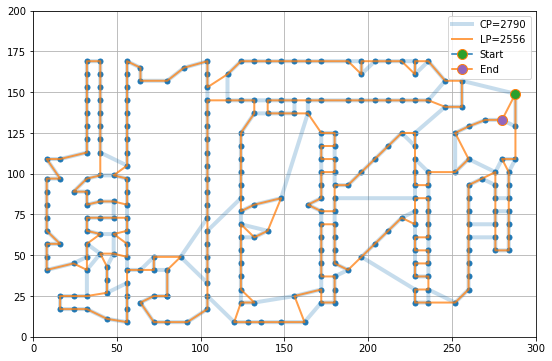

In [11]:
cp_sol = [
      0,   1, 279,   2, 278, 277, 248, 247, 243, 242,
    241, 240, 239, 238, 245, 244, 246, 249, 250, 229,
    228, 231, 230, 237, 236, 235, 234, 233, 232, 227,
    226, 225, 224, 223, 222, 218, 221, 220, 219, 202,
    203, 204, 205, 207, 206, 211, 212, 215, 216, 217,
    214, 213, 210, 209, 208, 251, 254, 255, 257, 256,
    253, 252, 139, 140, 141, 142, 143, 199, 201, 200,
    195, 194, 193, 191, 190, 189, 188, 187, 163, 164,
    165, 166, 167, 168, 169, 171, 170, 172, 105, 106,
    104, 103, 107, 109, 110, 113, 114, 116, 117,  61,
     62,  63,  65,  64,  84,  85, 115, 112,  86,  83,
     82,  87, 111, 108,  89,  90,  91, 102, 101, 100,
     99,  98,  97,  96,  95,  94,  93,  92,  79,  88,
     81,  80,  78,  77,  76,  74,  75,  73,  72,  71,
     70,  69,  66,  68,  67,  57,  56,  55,  54,  53,
     52,  51,  50,  49,  48,  47,  46,  45,  44,  43,
     58,  60,  59,  42,  41,  40,  39,  38,  37,  36,
     35,  34,  33,  32,  31,  30,  29, 124, 123, 122,
    121, 120, 119, 118, 156, 157, 158, 173, 162, 161,
    160, 174, 159, 150, 151, 155, 152, 154, 153, 128,
    129, 130, 131,  18,  19,  20, 127, 126, 125,  28,
     27,  26,  25,  21,  24,  22,  23,  13,  12,  14,
     11,  10,   9,   7,   8,   6,   5, 275, 274, 273,
    272, 271, 270,  15,  16,  17, 132, 149, 177, 176,
    175, 178, 179, 180, 181, 182, 183, 184, 186, 185,
    192, 196, 197, 198, 144, 145, 146, 147, 148, 138,
    137, 136, 135, 134, 133, 269, 268, 267, 266, 265,
    264, 263, 262, 261, 260, 258, 259, 276,   3,   4,
    0 ] # 280 nodes

lp_sol = [
      0,   1, 241, 242, 240, 239, 238, 237, 236, 235,
    234, 233, 232, 231, 230, 245, 244, 243, 246, 249,
    250, 229, 228, 227, 226, 225, 224, 223, 222, 221,
    220, 219, 218, 217, 216, 215, 214, 213, 212, 211,
    210, 209, 208, 251, 252, 207, 206, 205, 204, 203,
    202, 201, 199, 143, 142, 141, 146, 145, 144, 198,
    197, 200, 195, 194, 193, 196, 192, 191, 190, 189,
    188, 187, 186, 185, 184, 183, 182, 181, 180, 175,
    179, 178, 149, 177, 176, 150, 151, 155, 152, 154,
    153, 128, 127, 126, 125, 124, 123, 122, 121, 120,
    119, 118, 156, 157, 158, 159, 174, 160, 161, 162,
    163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
    173, 106, 105, 104, 103, 102, 101, 100,  99,  98,
     97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
    108, 107, 109, 111, 110, 113, 112,  86,  83,  82,
     87,  81,  80,  79,  78,  77,  76,  74,  75,  73,
     72,  71,  70,  69,  66,  68,  67,  57,  56,  55,
     54,  53,  52,  51,  50,  49,  48,  47,  46,  45,
     44,  43,  58,  62,  63,  65,  64,  84,  85, 115,
    114, 116, 117,  61,  60,  59,  42,  41,  40,  39,
     38,  37,  36,  35,  34,  33,  32,  31,  30,  29,
     28,  27,  26,  25,  21,  24,  22,  23,  13,  14,
     12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
    276, 275, 274, 273, 272, 271, 270,  15,  16,  17,
     18,  19,  20, 129, 130, 131, 132, 133, 269, 268,
    134, 135, 267, 266, 136, 137, 138, 148, 147, 140,
    139, 265, 264, 263, 262, 261, 260, 259, 258, 257,
    256, 253, 254, 255, 248, 247, 277, 278,   2, 279,
    0 ] # 280 nodes

loc_x, loc_y = np.swapaxes(np.asarray(default_locations), 0, 1)

fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(loc_x, loc_y, s=25)
ax.plot(loc_x[cp_sol], loc_y[cp_sol], label='CP=2790',
        color='C0', linestyle='solid', linewidth=4, alpha=0.25)
ax.plot(loc_x[lp_sol], loc_y[lp_sol], label='LP=2556',
        color='C1', linestyle='solid', linewidth=2, alpha=0.75)
ax.plot(loc_x[0], loc_y[0], label='Start', marker='o',
        markersize=10, markeredgecolor='C1', markerfacecolor='C2')
ax.plot(loc_x[-1], loc_y[-1], label='End', marker='o',
        markersize=10, markeredgecolor='C1', markerfacecolor='C4')

ax.set_xlim(0, 300)
ax.set_ylim(0, 200)
ax.grid()
ax.legend()

plt.show()